In [1]:
import pandas as pd #data analysis and manipulation
import numpy as np #numerical computing
import matplotlib.pyplot as plt #create animated and interactive visuals
%matplotlib inline
import os
for dirname,_, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/train.csv') #load train data
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.shape #view dimension of dataset

(159571, 8)

In [5]:
df.head() #top 5 rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail() #bottom 5 rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
col_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for col in col_names:
  print(df[col].value_counts())

toxic
0    144277
1     15294
Name: count, dtype: int64
severe_toxic
0    157976
1      1595
Name: count, dtype: int64
obscene
0    151122
1      8449
Name: count, dtype: int64
threat
0    159093
1       478
Name: count, dtype: int64
insult
0    151694
1      7877
Name: count, dtype: int64
identity_hate
0    158166
1      1405
Name: count, dtype: int64


In [8]:
df.info() #view summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df.isnull().sum() #check missing values in variables

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [19]:
#Exploratory Data Analysis
import seaborn as sns #creating statistical graphics
from wordcloud import WordCloud #visualization of word data

In [12]:
#Count of Each Label
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = df[labels].sum()

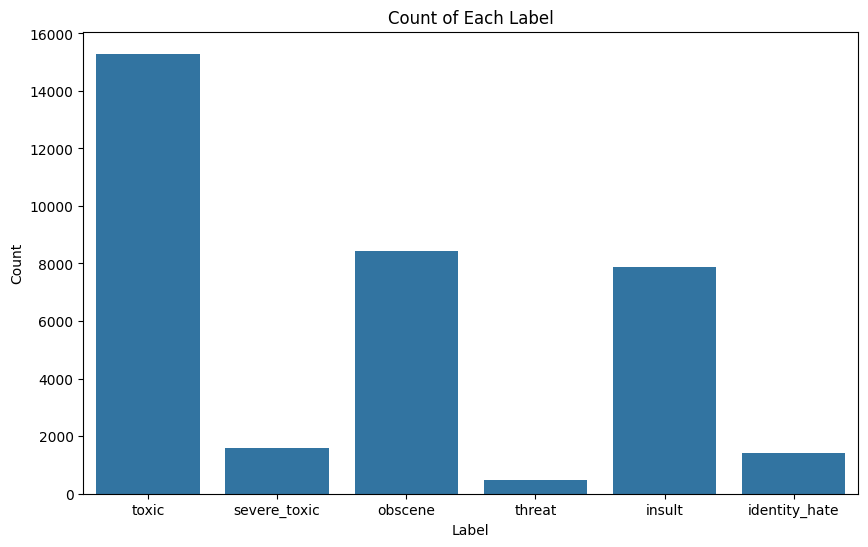

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

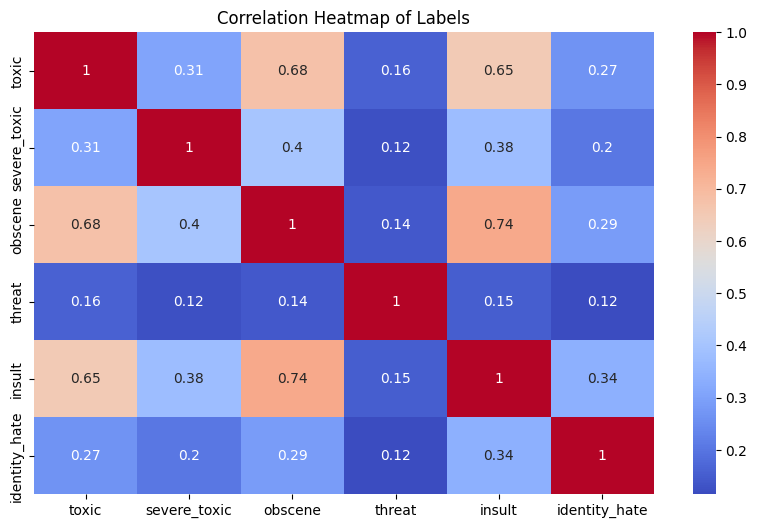

In [14]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[labels].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Labels')
plt.show()

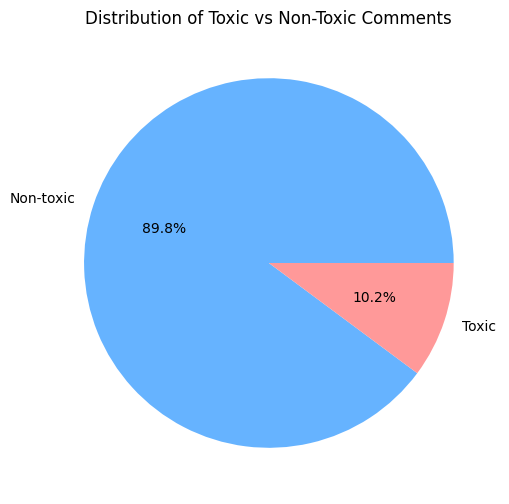

In [15]:
#Distribution of Toxicity Levels
df['toxic_any'] = df[labels].sum(axis=1) > 0

plt.figure(figsize=(6, 6))
df['toxic_any'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-toxic', 'Toxic'], colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.ylabel('')
plt.show()

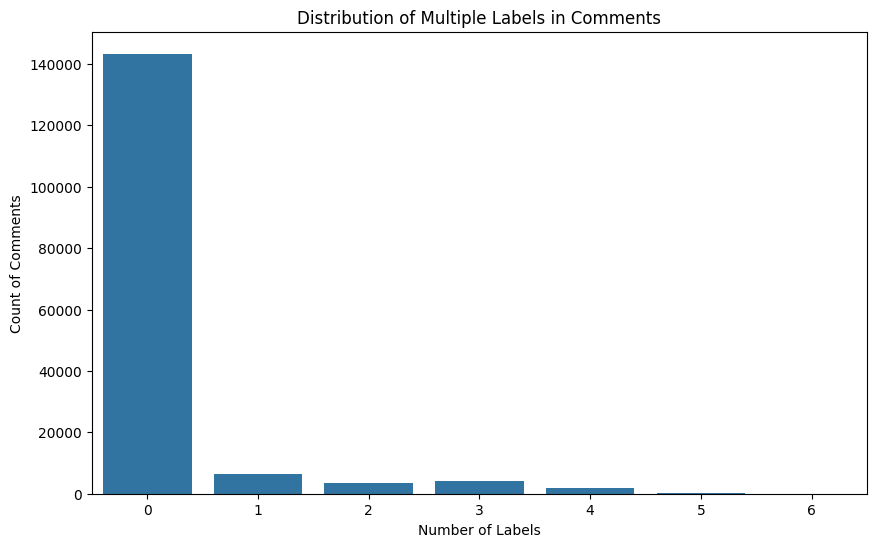

In [17]:
#Multilabel Distribution
multi_label_counts = df[labels].sum(axis=1).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=multi_label_counts.index, y=multi_label_counts.values)
plt.title('Distribution of Multiple Labels in Comments')
plt.xlabel('Number of Labels')
plt.ylabel('Count of Comments')
plt.show()

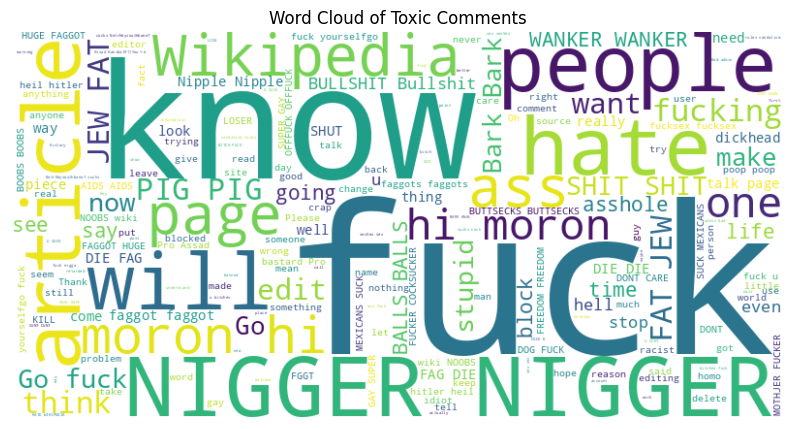

In [18]:
#Word Cloud of Toxic Comments
toxic_comments = df[df['toxic'] == 1]['comment_text']

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(toxic_comments))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Toxic Comments')
plt.show()

In [ ]:
#Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
#Feature Extraction using Tfidf
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)
X = tfidf.fit_transform(df['comment_text'])

In [ ]:
#Prepare Target Variables
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Selection and Training
logreg = LogisticRegression(max_iter=1000)
ovr_logreg = OneVsRestClassifier(logreg)
ovr_logreg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred = ovr_logreg.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names = y.columns))
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print("Overall F1 Score:", f1_score(y_test, y_pred, average = 'weighted'))

Classification Report:
               precision    recall  f1-score   support

        toxic       0.92      0.57      0.71      3056
 severe_toxic       0.59      0.24      0.34       321
      obscene       0.92      0.59      0.72      1715
       threat       0.47      0.11      0.18        74
       insult       0.83      0.46      0.59      1614
identity_hate       0.71      0.12      0.20       294

    micro avg       0.89      0.51      0.65      7074
    macro avg       0.74      0.35      0.46      7074
 weighted avg       0.87      0.51      0.64      7074
  samples avg       0.05      0.04      0.05      7074

Overall Accuracy: 0.9166849443835188
Overall F1 Score: 0.6402152717547788


In [ ]:
#Load test data
test_df = pd.read_csv('/content/test.csv')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
test_df.isna().sum() #check for any null values

,0
id,0
comment_text,0


In [ ]:
#Import important libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier #multi-label classification

#Define features and labels
X_train = df['comment_text']
y_train = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

#Create a pipeline with a Tfidf vectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultiOutputClassifier(MultinomialNB()))
])

#Train the model
pipeline.fit(X_train, y_train)

#Preprocess test data and make predictions
predictions = pipeline.predict_proba(test_df['comment_text'])

#Convert predictions from a list of arrays to a DataFrame
pred_df = pd.DataFrame(
    {label: preds[:, 1] for label, preds in zip(y_train.columns, predictions)}
)

#Add 'id' column from test data to the output DataFrame
output_df = pd.concat([test_df['id'], pred_df], axis=1)

#Display the output
print(output_df)

#Save output to CSV
output_df.to_csv('test_predictions_output.csv', index=False)

                      id     toxic  severe_toxic   obscene        threat  \
0       00001cee341fdb12  0.601056  1.511752e-05  0.090421  2.349835e-07   
1       0000247867823ef7  0.001675  1.360585e-05  0.000373  3.316895e-06   
2       00013b17ad220c46  0.102898  8.710718e-03  0.057980  2.450297e-03   
3       00017563c3f7919a  0.000183  1.069832e-07  0.000020  1.034620e-08   
4       00017695ad8997eb  0.006677  6.609631e-05  0.002072  1.107713e-05   
...                  ...       ...           ...       ...           ...   
153159  fffcd0960ee309b5  0.023768  7.245651e-06  0.002457  1.198053e-06   
153160  fffd7a9a6eb32c16  0.005865  2.731084e-05  0.001179  6.386746e-06   
153161  fffda9e8d6fafa9e  0.000962  5.082403e-06  0.000156  1.213743e-06   
153162  fffe8f1340a79fc2  0.000324  1.151962e-07  0.000023  2.864283e-08   
153163  ffffce3fb183ee80  0.150903  5.253528e-05  0.015009  1.123573e-05   

          insult  identity_hate  
0       0.027118   1.515859e-05  
1       0.000319   